## Определение перспективного тарифа для телеком-компании "Мегалайн"

**Описание проекта**

Клиентам федерального оператора сотовой связи «Мегалайн» предлагают два тарифных плана: «Смарт» и «Ультра». Для корректировки рекламного бюджета, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Ниже - предварительный анализ тарифов на небольшой выборке клиентов(данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год).

**Описание тарифов**

**Тариф «Смарт»**
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика


*Стоимость услуг сверх тарифного пакета:*
- минута разговора: 3 рубля
- сообщение: 3 рубля
- 1 Гб интернет-трафика: 200 рублей


**Тариф «Ультра»**
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

*Стоимость услуг сверх тарифного пакета:*
- минута разговора: 1 рубль
- сообщение: 1 рубль
- 1 Гб интернет-трафика: 150 рублей

**План проекта:** 
- Изучение общей информации по датасетам, по которым будет проводиться анализ.
- Подготовка данных для дальнейшего анализа, а именно:
    - Приведение данных к нужным типам
    - Проверка дадасетов на ошибки в данных и исправление их.
- Рассчеты по имеющимся данным (для каждого пользователя): 
    - Количество сделанных звонков и израсходованных минут разговора по месяцам
    - Количество отправленных сообщений по месяцам
    - Объем израсходованного интернет-трафика по месяцам
    - Помесячная выручка с каждого пользователя 
- Описание поведения клиентов оператора, исходя из выборки:
    - Расчет количества минут, сообщений и объёма интернет-трафика, который требуется пользователям каждого тарифа в месяц.
    - Расчет среднего количества, дисперсии и стандартного отклонения.
    - Визуализация расчетов. 
    - Сравнение тарифных планов.
- Проверка гипотез:
    - Гипотеза 1: "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются"
    - Гипотеза 2: "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"
- Выводы по проекту


🔹  <font color='blue'><b>    Цель проекта:</b> Проанализировать поведение клиентов на тарифных планах: «Смарт» и «Ультра» и сделать вывод — какой тариф приносит больше денег.

## Изучение данных

<div class="alert alert-info"><b>Общая информация</b> о таблице <b>calls</b> и обзор первых 5ти строк таблицы</div>

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")

#убираем scientific notation для лучшего восприятия
pd.set_option('display.float_format', lambda x: '%.3f' % x)

data_calls = pd.read_csv('calls.csv')

print('Первые 5 строк датафрейма calls')
display(data_calls.head())
print(60 * '= ')

print('Общая информация: ')
data_calls.info()
print(60 * '= ')

print('Описательная статистика:')
display(data_calls.describe(include='all'))
print(60 * '= ')

print(f'Полных дубликатов: {data_calls.duplicated().sum()}')
print(60 * '= ')

Первые 5 строк датафрейма calls


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.000,1000
1,1000_1,2018-08-17,0.000,1000
2,1000_2,2018-06-11,2.850,1000
3,1000_3,2018-09-21,13.800,1000
4,1000_4,2018-12-15,5.180,1000


= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Общая информация: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Описательная статистика:


,id,call_date,duration,user_id
count,202607,202607,202607.000,202607.000
unique,202607,365,NaN,NaN
top,1497_138,2018-12-31,NaN,NaN
freq,1,1435,NaN,NaN
mean,NaN,NaN,6.756,1253.941
std,NaN,NaN,5.843,144.723
min,NaN,NaN,0.000,1000.000
25%,NaN,NaN,1.300,1126.000
50%,NaN,NaN,6.000,1260.000
75%,NaN,NaN,10.700,1379.000


= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Полных дубликатов: 0
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 


In [76]:
print('Количество строк с пропущенными звонками:')
print(f'{len(data_calls[data_calls["duration"]==0])} из {len(data_calls)}')

Количество строк с пропущенными звонками:
39613 из 202607


Промежуточный вывод по таблице calls: 
- 202 тыс. строк. 
- пропусков и дубликатов нет
- есть звонки с продолжительностью 0 (почти 40тыс из 202тыс)- не будем их удалять, так как это пропущенные звонки.
- средняя длительность звонка - 6.7 мин. Медиана - 6 мин.
- в столбце call_date - поменять тип данных на datetime64
- в столбце duration - округлить значения до минут в большую сторону.(для анализа нам будут нужны минуты)


<div class="alert alert-info"><b>Общая информация</b> о таблице <b>internet</b> и обзор первых 5ти строк таблицы</div>

In [77]:
data_internet = pd.read_csv('internet.csv', index_col=0)
print('Первые 5 строк датафрейма internet')
display(data_internet.head())
print(60 * '= ')

print('Общая информация: ')
data_internet.info()
print(60 * '= ')

print('Описательная статистика:')
display(data_internet.describe(include='all'))
print(60 * '= ')

print(f'Полных дубликатов: {data_internet.duplicated().sum()}')
print(60 * '= ')

Первые 5 строк датафрейма internet


,id,mb_used,session_date,user_id
0,1000_0,112.950,2018-11-25,1000
1,1000_1,1052.810,2018-09-07,1000
2,1000_2,1197.260,2018-06-25,1000
3,1000_3,550.270,2018-08-22,1000
4,1000_4,302.560,2018-09-24,1000


= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Общая информация: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Описательная статистика:


,id,mb_used,session_date,user_id
count,149396,149396.000,149396,149396.000
unique,149396,NaN,365,NaN
top,1174_99,NaN,2018-12-31,NaN
freq,1,NaN,1057,NaN
mean,NaN,370.192,NaN,1252.100
std,NaN,278.301,NaN,144.051
min,NaN,0.000,NaN,1000.000
25%,NaN,138.188,NaN,1130.000
50%,NaN,348.015,NaN,1251.000
75%,NaN,559.553,NaN,1380.000


= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Полных дубликатов: 0
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 


In [78]:
print('Количество строк с интернет-сессией 0 мб:')
print(f'{len(data_internet[data_internet["mb_used"]==0])} из {len(data_internet)}')

Количество строк с интернет-сессией 0 мб:
19598 из 149396


<div class="alert alert-info"> Смотрим на гистограмму распределения объема интернет-сессий </div>

<AxesSubplot:>

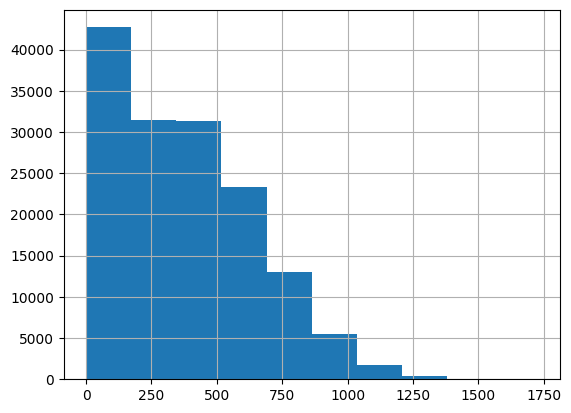

In [79]:
data_internet['mb_used'].hist()

Промежуточный вывод по таблице internet: 
- 150 тыс. строк. 
- пропусков и дубликатов нет
- среднее потребление интернета - 370 мб. Медиана - 348 мб.
- почти 20 тыс строк из 150 тыс - с нулевой интернет-сессией. 

- в столбце session_date - поменять тип данных на datetime64
- в столбце mb_used - в следующих шагах округлим значения с большую сторону и переведем мб в гб(для анализа и расчетов нам будут нужны гб)

**- распределение интернет-сессий плавное. Выраженных аномалий нет.**

<div class="alert alert-info"><b>Общая информация</b> о таблице <b>messages</b> и обзор первых 5ти строк таблицы</div>

In [80]:
data_messages = pd.read_csv('messages.csv')#('/content/drive/MyDrive/Colab Notebooks/проект 4/messages.csv')

print('Первые 5 строк датафрейма messages')
display(data_messages.head())
print(60 * '= ')

print('Общая информация: ')
data_messages.info()
print(60 * '= ')

print('Описательная статистика:')
display(data_messages.describe(include='all'))
print(60 * '= ')

print(f'Полных дубликатов: {data_messages.duplicated().sum()}')
print(60 * '= ')

Первые 5 строк датафрейма messages


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Общая информация: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Описательная статистика:


,id,message_date,user_id
count,123036,123036,123036.000
unique,123036,364,NaN
top,1174_99,2018-12-31,NaN
freq,1,859,NaN
mean,NaN,NaN,1256.989
std,NaN,NaN,143.524
min,NaN,NaN,1000.000
25%,NaN,NaN,1134.000
50%,NaN,NaN,1271.000
75%,NaN,NaN,1381.000


= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Полных дубликатов: 0
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 


Промежуточный вывод по таблице messages: 
- 123 тыс. строк. 
- пропусков и дубликатов нет
- в столбце message_date - поменять тип данных на datetime64

<div class="alert alert-info"><b>Общая информация</b> о таблице <b>users</b> и обзор первых 5ти строк таблицы</div>

In [81]:
data_users = pd.read_csv('users.csv')#('/content/drive/MyDrive/Colab Notebooks/проект 4/users.csv')

print('Первые 5 строк датафрейма users')
display(data_users.head())
print(60 * '= ')

print('Общая информация: ')
data_users.info()
print(60 * '= ')

print('Описательная статистика:')
display(data_users.describe(include='all'))
print(60 * '= ')

print(f'Полных дубликатов: {data_users.duplicated().sum()}')
print(60 * '= ')

Первые 5 строк датафрейма users


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Общая информация: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Описательная статистика:


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
count,500.000,500.000,38,500,500,500,500,500
unique,NaN,NaN,33,76,246,419,270,2
top,NaN,NaN,2018-12-21,Москва,Радим,Андреенко,2018-05-28,smart
freq,NaN,NaN,2,99,6,5,8,351
mean,1249.500,46.588,NaN,NaN,NaN,NaN,NaN,NaN
std,144.482,16.668,NaN,NaN,NaN,NaN,NaN,NaN
min,1000.000,18.000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1124.750,32.000,NaN,NaN,NaN,NaN,NaN,NaN
50%,1249.500,46.000,NaN,NaN,NaN,NaN,NaN,NaN
75%,1374.250,62.000,NaN,NaN,NaN,NaN,NaN,NaN


= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Полных дубликатов: 0
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 


In [82]:
print('Проверка столбца city на неявные дубликаты')
print(60 * '= ')
data_users['city'].unique()

Проверка столбца city на неявные дубликаты
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 


array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

Промежуточный вывод по таблице users: 
- 500 строк. 
- дубликатов нет. Пропущенные значения в churn_date говорят о том, что тариф ещё действовал на момент выгрузки данных.
- выбросов и неадекватных значений не замечено.
- в столбце churn_date и reg_date - поменять тип данных на datetime64


<div class="alert alert-info"><b>Общая информация</b> о таблице <b>tariffs</b> и обзор первых 5ти строк таблицы</div>

In [83]:
data_tariffs = pd.read_csv('tariffs.csv')#('/content/drive/MyDrive/Colab Notebooks/проект 4/tariffs.csv')

print('Первые 5 строк датафрейма tariffs')
display(data_tariffs.head())
print(60 * '= ')

print('Общая информация: ')
data_tariffs.info()
print(60 * '= ')

Первые 5 строк датафрейма tariffs


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Общая информация: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 


Промежуточный вывод по таблице tariffs:
- Информация о тарифах. Никаких аномалий не замечено.

## Подготовка данных

<div class="alert alert-info">Замена типов данных в столбцах с датой на <b>datetime64.</b>(Таблицы: calls, internet, messages, users)</div>

In [85]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], format='%Y-%m-%d')
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d')

<div class="alert alert-info">Округление значений до минут в столбце <b>duration(таблица calls)</b></div>

In [86]:
data_calls['duration'] = np.ceil(data_calls['duration'])
display(data_calls)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.000,1000
1,1000_1,2018-08-17,0.000,1000
2,1000_2,2018-06-11,3.000,1000
3,1000_3,2018-09-21,14.000,1000
4,1000_4,2018-12-15,6.000,1000
...,...,...,...,...
202602,1499_215,2018-12-26,1.000,1499
202603,1499_216,2018-10-18,19.000,1499
202604,1499_217,2018-11-10,11.000,1499
202605,1499_218,2018-10-06,5.000,1499


<div class="alert alert-info">Добавление столца <b>month</b> в таблицы data_calls, data_messages, data_internet</div>

In [87]:
data_calls['month'] = data_calls['call_date'].dt.month
data_messages['month'] = data_messages['message_date'].dt.month
data_internet['month'] = data_internet['session_date'].dt.month

<div class="alert alert-info">Создание сводной таблицы <b>data_calls_pivot</b> в которой видим количество сделанных звонков и израсходованных минут разговора по месяцам</div>

In [88]:
data_calls_pivot = data_calls.pivot_table(index = (['user_id','month']), values = 'duration', aggfunc=(['sum','count']))
display(data_calls_pivot)

sum    count
              duration duration
user_id month                  
1000    5      159.000       22
        6      172.000       43
        7      340.000       47
        8      408.000       52
        9      466.000       58
...                ...      ...
1498    10     247.000       41
1499    9       70.000        9
        10     449.000       68
        11     612.000       74
        12     492.000       69

[3174 rows x 2 columns]

<div class="alert alert-info">Создание сводной таблицы <b>data_messages_pivot</b> в которой видим количество отправленных сообщений по месяцам</div>

In [89]:
data_messages_pivot = data_messages.pivot_table(index = (['user_id','month']), values = 'message_date', aggfunc=['count'])
display(data_messages_pivot)

count
              message_date
user_id month             
1000    5               22
        6               60
        7               75
        8               81
        9               57
...                    ...
1498    10              42
1499    9               11
        10              48
        11              59
        12              66

[2717 rows x 1 columns]

<div class="alert alert-info">Создание сводной таблицы <b>data_internet_pivot</b> в которой видим объем израсходованного интернет-трафика по месяцам</div>

In [90]:
data_internet_pivot = data_internet.pivot_table(index = (['user_id','month']), values = 'mb_used', aggfunc=['sum'])
display(data_internet_pivot)

sum
                mb_used
user_id month          
1000    5      2253.490
        6     23233.770
        7     14003.640
        8     14055.930
        9     14568.910
...                 ...
1498    10    20579.360
1499    9      1845.750
        10    17788.510
        11    17963.310
        12    13055.580

[3203 rows x 1 columns]

<div class="alert alert-info">Создание таблицы <b>data_generous</b> в которой обьединим всю информацию из сводных таблиц: <b>data_calls_pivot, data_messages_pivot, data_internet_pivot</b> </div>

In [91]:
data_generous = data_calls_pivot.merge(data_messages_pivot, on=(['user_id','month']), how='outer')
data_generous = data_generous.merge(data_internet_pivot, on=(['user_id','month']), how='outer')

display(data_generous.head())

sum    count                    sum
              duration duration message_date   mb_used
user_id month                                         
1000    5      159.000   22.000       22.000  2253.490
        6      172.000   43.000       60.000 23233.770
        7      340.000   47.000       75.000 14003.640
        8      408.000   52.000       81.000 14055.930
        9      466.000   58.000       57.000 14568.910

<div class="alert alert-info">Скидываем мультииндекс. Переменовываем столбцы для лучшего восприятия. Смотрим, как выгляит таблица </div>

In [92]:
data_generous = data_generous.reset_index()
#data_generous = data_generous.rename(columns={'sum','duration': 'sum_duration'})
data_generous.columns = ['user_id', 'month', 'sum_duration', 'count_duration', 'message_count', 'sum_mb_used']
display(data_generous.head())

,user_id,month,sum_duration,count_duration,message_count,sum_mb_used
0,1000,5,159.000,22.000,22.000,2253.490
1,1000,6,172.000,43.000,60.000,23233.770
2,1000,7,340.000,47.000,75.000,14003.640
3,1000,8,408.000,52.000,81.000,14055.930
4,1000,9,466.000,58.000,57.000,14568.910


In [140]:
print('Количество строк ДО обьединения')
print(len(data_generous))

Количество строк ДО обьединения
3216


<div class="alert alert-info">Присоединяем к <b>data_generous</b> таблицу <b>data_users</b> в которой храниться информация о тарифах.  </div>

In [95]:
data_users_tariff = data_users[['user_id','tariff','city']] #столбец 'city' для анализа по городам в шаге 4.
data_generous = data_generous.merge(data_users_tariff, on=(['user_id']), how='outer')

<div class="alert alert-info">Присоединяем к <b>data_generous</b> таблицу <b>data_tariffs</b> в которой храниться информация о ценах на тарифы.</div>

In [96]:
data_tariffs = data_tariffs.rename(columns={'tariff_name': 'tariff'})
data_generous = data_generous.merge(data_tariffs, on=(['tariff']), how='left')

In [97]:
print('Количество строк ПОСЛЕ обьединения')
print(len(data_generous))

Количество строк ПОСЛЕ обьединения
3216


<div class="alert alert-info">Округляем столбец <b>sum_mb_used</b> в большую сторону и переводим из МБ в ГБ. Столбец <b>sum_mb_used</b> так же переводим в ГБ. Переменовываем столбцы соответственно. Смотрим на таблицу.</div>

In [98]:
data_generous['sum_mb_used'] = np.ceil(data_generous['sum_mb_used'] / 1024)
data_generous['mb_per_month_included'] = data_generous['mb_per_month_included'] / 1024
data_generous = data_generous.rename(columns={'sum_mb_used': 'sum_gb_used', 'mb_per_month_included': 'gb_per_month_included'})

display(data_generous.head(10))

,user_id,month,sum_duration,count_duration,message_count,sum_gb_used,tariff,city,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.000,159.000,22.000,22.000,3.000,ultra,Краснодар,1000,30.000,3000,1950,150,1,1
1,1000,6.000,172.000,43.000,60.000,23.000,ultra,Краснодар,1000,30.000,3000,1950,150,1,1
2,1000,7.000,340.000,47.000,75.000,14.000,ultra,Краснодар,1000,30.000,3000,1950,150,1,1
3,1000,8.000,408.000,52.000,81.000,14.000,ultra,Краснодар,1000,30.000,3000,1950,150,1,1
4,1000,9.000,466.000,58.000,57.000,15.000,ultra,Краснодар,1000,30.000,3000,1950,150,1,1
5,1000,10.000,350.000,57.000,73.000,15.000,ultra,Краснодар,1000,30.000,3000,1950,150,1,1
6,1000,11.000,338.000,43.000,58.000,15.000,ultra,Краснодар,1000,30.000,3000,1950,150,1,1
7,1000,12.000,333.000,46.000,70.000,10.000,ultra,Краснодар,1000,30.000,3000,1950,150,1,1
8,1001,11.000,430.000,59.000,NaN,18.000,smart,Москва,50,15.000,500,550,200,3,3
9,1001,12.000,414.000,63.000,NaN,14.000,smart,Москва,50,15.000,500,550,200,3,3


<div class="alert alert-info">Проверим количество пропусков в столбцах после обьединения таблиц</div>

In [99]:
data_generous.isna().sum()

user_id                    0
month                      2
sum_duration              42
count_duration            42
message_count            499
sum_gb_used               13
tariff                     0
city                       0
messages_included          0
gb_per_month_included      0
minutes_included           0
rub_monthly_fee            0
rub_per_gb                 0
rub_per_message            0
rub_per_minute             0
dtype: int64

<div class="alert alert-info">Изучим подробнее абонентов с пропусками в столбце 'month'</div>

In [100]:
data_generous[data_generous['month'].isna()]

,user_id,month,sum_duration,count_duration,message_count,sum_gb_used,tariff,city,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
3214,1128,NaN,NaN,NaN,NaN,NaN,ultra,Волжский,1000,30.000,3000,1950,150,1,1
3215,1371,NaN,NaN,NaN,NaN,NaN,smart,Омск,50,15.000,500,550,200,3,3


In [101]:
display(data_users[data_users['user_id']== 1128])
display(data_users[data_users['user_id']== 1371])

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


**Видим 2 абонента, которые подключили ТП в декабре и отключили через 5 и 8 дней. За тарифный план они оплатили, так что заменим их на последний месяц года - 12ый.**

In [102]:
data_generous['month'] = data_generous['month'].fillna(12)

<div class="alert alert-info">Пропуски в sum_duration, count_duration, message_count и sum_gb_used заполним "0"</div>

In [103]:
data_generous['sum_duration'] = data_generous['sum_duration'].fillna(0)
data_generous['count_duration'] = data_generous['count_duration'].fillna(0)
data_generous['message_count'] = data_generous['message_count'].fillna(0)
data_generous['sum_gb_used'] = data_generous['sum_gb_used'].fillna(0)

<div class="alert alert-info">Проверка на пропуски после их заполнения</div>

In [104]:
data_generous.isna().sum()

user_id                  0
month                    0
sum_duration             0
count_duration           0
message_count            0
sum_gb_used              0
tariff                   0
city                     0
messages_included        0
gb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
dtype: int64

<div class="alert alert-info">Добавляем столбец <b>revenue</b> в котором считаем помесячную выручку с каждого пользователя с учетом стоимости тарифа и перерасхода минут, смс и гб</div>

In [105]:
def revenue_func(row):  
    pay_for_calls = 0
    pay_for_masseges = 0
    pay_for_internet = 0
    if row['tariff'] == 'ultra':
        if row['sum_duration'] > row['minutes_included']:
            pay_for_calls = (row['sum_duration'] - row['minutes_included']) * row['rub_per_minute']
        if row['message_count'] > row['messages_included']:
            pay_for_masseges = (row['message_count'] - row['messages_included']) * row['rub_per_message']
        if row['sum_gb_used'] > row['gb_per_month_included']:
            pay_for_internet = (row['sum_gb_used'] - row['gb_per_month_included']) * row['rub_per_gb']
            
        return row['rub_monthly_fee'] + pay_for_internet + pay_for_masseges + pay_for_calls
    
    else:
        if row['sum_duration'] > row['minutes_included']:
            pay_for_calls = (row['sum_duration'] - row['minutes_included']) * row['rub_per_minute']
        if row['message_count'] > row['messages_included']:
            pay_for_masseges = (row['message_count'] - row['messages_included']) * row['rub_per_message']
        if row['sum_gb_used'] > row['gb_per_month_included']:
            pay_for_internet = (row['sum_gb_used'] - row['gb_per_month_included']) * row['rub_per_gb']
        
        return row['rub_monthly_fee'] + pay_for_internet + pay_for_masseges + pay_for_calls  

data_generous['revenue'] = data_generous.apply(revenue_func, axis=1)

<div class="alert alert-info">Смотрим на итоговую таблицу со столбцом выручки(revenue) по каждому абоненту</div>

In [106]:
display(data_generous.head(10))

,user_id,month,sum_duration,count_duration,message_count,sum_gb_used,tariff,city,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
0,1000,5.000,159.000,22.000,22.000,3.000,ultra,Краснодар,1000,30.000,3000,1950,150,1,1,1950.000
1,1000,6.000,172.000,43.000,60.000,23.000,ultra,Краснодар,1000,30.000,3000,1950,150,1,1,1950.000
2,1000,7.000,340.000,47.000,75.000,14.000,ultra,Краснодар,1000,30.000,3000,1950,150,1,1,1950.000
3,1000,8.000,408.000,52.000,81.000,14.000,ultra,Краснодар,1000,30.000,3000,1950,150,1,1,1950.000
4,1000,9.000,466.000,58.000,57.000,15.000,ultra,Краснодар,1000,30.000,3000,1950,150,1,1,1950.000
5,1000,10.000,350.000,57.000,73.000,15.000,ultra,Краснодар,1000,30.000,3000,1950,150,1,1,1950.000
6,1000,11.000,338.000,43.000,58.000,15.000,ultra,Краснодар,1000,30.000,3000,1950,150,1,1,1950.000
7,1000,12.000,333.000,46.000,70.000,10.000,ultra,Краснодар,1000,30.000,3000,1950,150,1,1,1950.000
8,1001,11.000,430.000,59.000,0.000,18.000,smart,Москва,50,15.000,500,550,200,3,3,1150.000
9,1001,12.000,414.000,63.000,0.000,14.000,smart,Москва,50,15.000,500,550,200,3,3,550.000


## Анализ данных

<div class="alert alert-info"> Перед анализом посмотрим остались ли у нас ячейки с интернет трафиком = 0(sum_gb_used) и количеством минут = 0(sum_duration) после группировки по месяцам.</div>

In [108]:
print('Всего абонентов в базе с тарифом SMART:')
print(len(data_generous[data_generous['tariff'] == 'smart']))
print('Количество абонентов с трафиком "0" за месяц на тарифе SMART')
print(len(data_generous[data_generous['sum_gb_used'] == 0][data_generous['tariff'] == 'smart']))
print('Количество абонентов с сумарным количеством минут - "0" за месяц на тарифе SMART')
print(len(data_generous[data_generous['sum_duration'] == 0][data_generous['tariff'] == 'smart']))

print(60*'=')

print('Всего абонентов в базе с тарифом ULTRA:')
print(len(data_generous[data_generous['tariff'] == 'ultra']))
print('Количество абонентов с трафиком "0" за месяц на тарифе ULTRA')
print(len(data_generous[data_generous['sum_gb_used'] == 0][data_generous['tariff'] == 'ultra']))
print('Количество абонентов с сумарным количеством минут - "0" за месяц на тарифе ULTRA')
print(len(data_generous[data_generous['sum_duration'] == 0][data_generous['tariff'] == 'ultra']))

Всего абонентов в базе с тарифом SMART:
2230
Количество абонентов с трафиком "0" за месяц на тарифе SMART
3
Количество абонентов с сумарным количеством минут - "0" за месяц на тарифе SMART
9
Всего абонентов в базе с тарифом ULTRA:
986
Количество абонентов с трафиком "0" за месяц на тарифе ULTRA
12
Количество абонентов с сумарным количеством минут - "0" за месяц на тарифе ULTRA
39


Как видим - нулевых ячеек практически не осталось. 

<div class="alert alert-info"> Строим сводную таблицу, чтобы понять сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Считаем среднее количество, медиану, дисперсию и стандартное отклонение для этих показателей.</div>

In [109]:
data_generous_pivot = data_generous.pivot_table(index = 'tariff',
                                                values = (['sum_duration','message_count','sum_gb_used', 'revenue']),
                                                aggfunc=(['mean','median','var','std'])
                                               ).style.format("{:,.1f}")

# display(data_generous_pivot.round(1))
display(data_generous_pivot)

**Промежуточный вывод:**

**Минуты**
- **На тарифе smart абонены укладываются в свои включенные 500 минут(420 мин в среднем).**
- Среднее и медиана практически не отличаются, значит распределение должно быть нормальным, а не скошенным. 
- Стандартное отклонение 190. А значит все что выше 420+190*3 - можно считать выбросами. Таких значений всего 7 из 2229. Расчеты ниже.


- **На тарифе ultra абоненты тратят не намного больше минут, чем на smart - 545 из 3000, которые включены в тариф.** 
- Среднее чуть больше медианы, а значит распределение будет немного скошенным вправо.
- Стандартное отклонение 307. А значит все что выше 545+307*3 - можно считать выбросами. Таких значений всего 2 из 985. Расчеты ниже.

**Интернет**
- **На тарифе smart абонены используют в среднем 16,3 гб интернета при включенных 15гб**. 
- Медиана выше среднего( 17гб против 16,3 гб), а значит график будет немного скошен влево.
- Стандартное отклонение 5,7 гб. А значит все что выше 16,3+5,7*3 - можно считать выбросами. Таких значений всего 8 из 2229. Расчеты ниже.


- **На тарифе ultra абонены используют в среднем 19,7 гб интернета при включенных 30гб**. 
- Медиана немного ниже среднего(19гб против 19,7 гб), а значит график будет немного скошен вправо.
- Стандартное отклонение 9,7 гб. А значит все что выше 19,7+9,7*3 - можно считать выбросами. Таких значений всего 1 из 985. Расчеты ниже.

**СМС**
- **На тарифе smart абонены используют в среднем 39 СМС при включенных 50 СМС.**
- Медиана ниже среднего(34 против 39), а значит график будет скошен вправо.
- Стандартное отклонение 27 смс. А значит все что выше 39+27*3 - можно считать выбросами. Таких значений всего 11 из 2229. Расчеты ниже.


- **На тарифе ultra абонены используют в среднем 61 СМС при включенных 1000 СМС.**
- Медиана ниже среднего(51 против 61), а значит график будет скошен вправо.
- Стандартное отклонение 46 смс. А значит все что выше 61+46*3 - можно считать выбросами. Таких значений всего 4 из 985. Расчеты ниже.

**Выручка**
- **На тарифе smart средняя выручка по абоненту почти 1300руб, при абоненской плате 550руб**
- Медиана весомо ниже среднего(1020 против 1300), а значит график будет скошен вправо.
- Стандартное отклонение 818 руб. А значит все что выше 1300+818*3 - можно считать выбросами. Таких значений 25 из 2229. Расчеты ниже.


- **На тарифе ultra средняя выручка по абоненту почти 2070руб, при абоненской плате 1950**
- Медиана так же ниже среднего(2070 против 1950), а значит график будет скошен вправо.
- Стандартное отклонение намного меньше чем у тарифа smart - 376руб. А значит все что выше 2070+376*3 - можно считать выбросами. Таких значений 34 из 985. Расчеты ниже.

***Так как распределение не везде "нормальное" - правило трех сигм не везде работает. Он выбрасов избавляться не будем, а просто имеем ввиду выбивающиеся значения.***


<div class="alert alert-info"> Считаем выбросы по правилу трех сигм </div>

In [110]:
print('Выбросы по правилу трех сигм:')
print('Минуты на тарифе Smart:')
print(len(data_generous[data_generous['sum_duration'] > (420+190*3)][data_generous['tariff'] == 'smart']))
print('Минуты на тарифе Ultra:')
print(len(data_generous[data_generous['sum_duration'] > (545+307*3)][data_generous['tariff'] == 'ultra']))
print('Интернет на тарифе Smart:')
print(len(data_generous[data_generous['sum_gb_used'] > (16.3+5.7*3)][data_generous['tariff'] == 'smart']))
print('Интернет на тарифе Ultra:')
print(len(data_generous[data_generous['sum_gb_used'] > (19.7+9.7*3)][data_generous['tariff'] == 'ultra']))
print('СМС на тарифе Smart:')
print(len(data_generous[data_generous['message_count'] > (39+27*3)][data_generous['tariff'] == 'smart']))
print('СМС на тарифе Ultra:')
print(len(data_generous[data_generous['message_count'] > (61+46*3)][data_generous['tariff'] == 'ultra']))
print('Выручка на тарифе Smart:')
print(len(data_generous[data_generous['revenue'] > (1300+818*3)][data_generous['tariff'] == 'smart']))
print('Выручка на тарифе Ultra:')
print(len(data_generous[data_generous['revenue'] > (2070+376*3)][data_generous['tariff'] == 'ultra']))

Выбросы по правилу трех сигм:
Минуты на тарифе Smart:
7
Минуты на тарифе Ultra:
2
Интернет на тарифе Smart:
8
Интернет на тарифе Ultra:
1
СМС на тарифе Smart:
11
СМС на тарифе Ultra:
4
Выручка на тарифе Smart:
25
Выручка на тарифе Ultra:
34


<div class="alert alert-info"> Рассмотрим на гистограмме <b>распределение потребления минут на тарифе SMART</b> </div>

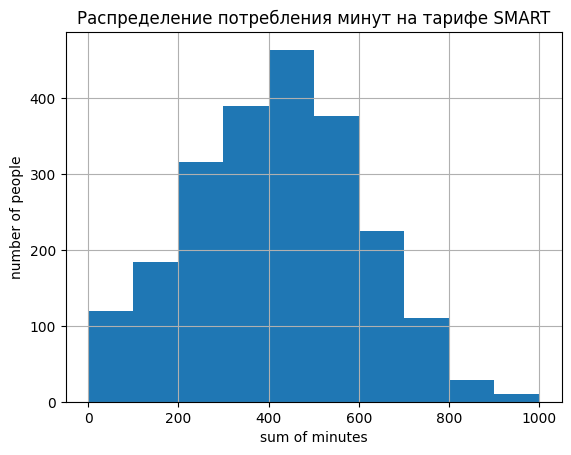

In [111]:
ax = data_generous[data_generous['tariff']=='smart']['sum_duration'].hist(range=(0, 1000))

ax.set_title('Распределение потребления минут на тарифе SMART')
ax.set_xlabel('sum of minutes')
ax.set_ylabel('number of people')

plt.show()

Нормальное распределение

<div class="alert alert-info"> Рассмотрим на гистограмме <b>распределение потребления минут на тарифе ULTRA</b> </div>

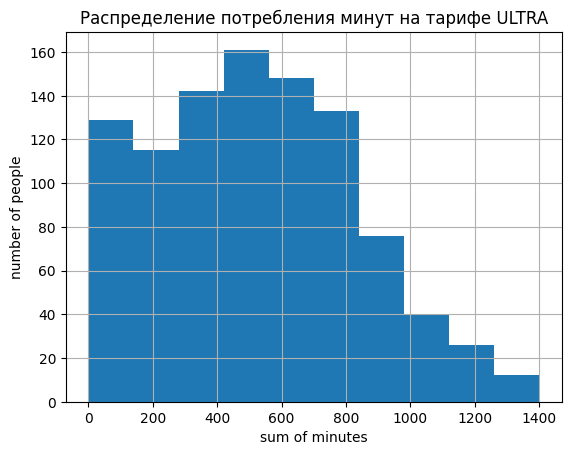

In [112]:
ax = data_generous[data_generous['tariff']=='ultra']['sum_duration'].hist(range=(0, 1400))

ax.set_title('Распределение потребления минут на тарифе ULTRA')
ax.set_ylabel('number of people')
ax.set_xlabel('sum of minutes')

plt.show()

Распределение немного скошенно вправо

In [113]:
# check
data_generous[data_generous['tariff']=='ultra']['sum_duration'].agg(['mean', 'median'])

mean     526.089
median   518.000
Name: sum_duration, dtype: float64

<div class="alert alert-info"> Сравление гистограмм <b>распределения потребления минут на тарифах SMART ULTRA</b> </div>

<AxesSubplot:ylabel='Frequency'>

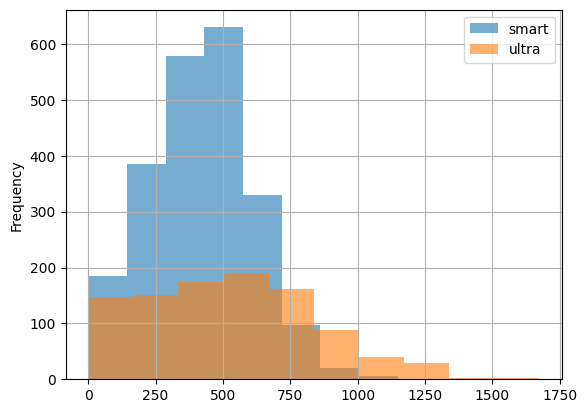

In [114]:
data_generous[data_generous['tariff']=='smart']['sum_duration'].plot(
    kind ='hist',
    grid=True,
    label='smart',
    legend=True,
    alpha = 0.6
)
data_generous[data_generous['tariff']=='ultra']['sum_duration'].plot(
    kind ='hist',
    grid=True,
    label='ultra',
    legend=True,
    alpha = 0.6
)


Распределение минут немного отличается. На тарифе ULTRA пользователи тратят чуть больше минут. Подробнее описано выше.

<div class="alert alert-info"> Сравление графиков <b> потребления минут на тарифах SMART и ULTRA по месяцам
   </b> </div>

<AxesSubplot:xlabel='month'>

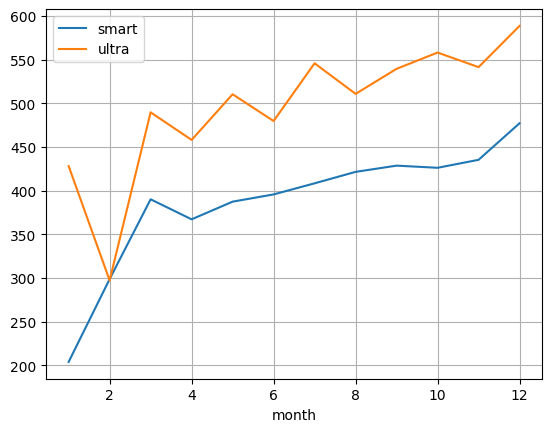

In [115]:
smart_min = data_generous[data_generous['tariff']=='smart'].groupby('month')['sum_duration'].mean()
ultra_min = data_generous[data_generous['tariff']=='ultra'].groupby('month')['sum_duration'].mean()

smart_min.plot(
    x='month',
    grid=True,
    label='smart',
    legend=True
) 

ultra_min.plot(
    x='month',
    grid=True,
    label='ultra',
    legend=True
)

Отчетливо видим, что потребление минут на тарифе ultra выше.

Количество минут потребляемых пользователями по месяцам ростет на обоих тарифах. Вероятнее всего это потому что приходят новые пользователи и они подключаются не всегда в начале месяца. Поэтому в момент подключения их минуты занижены, зато в следующем месяце они уже засчитаны полностью. Так с ростом абонентов растут и средние минуты.

<div class="alert alert-info"> Рассмотрим на гистограмме <b>распределение потребления ГБ на тарифе SMART</b> </div>

<AxesSubplot:>

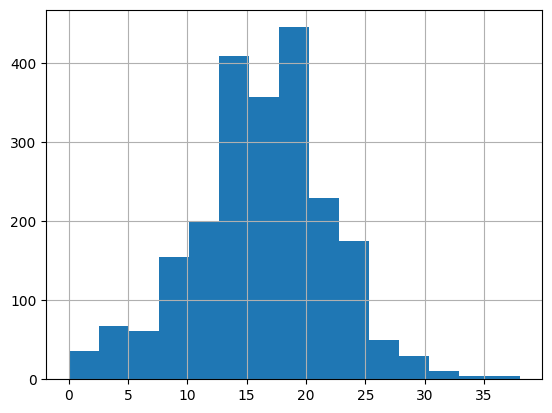

In [116]:
data_generous[data_generous['tariff']=='smart']['sum_gb_used'].hist(bins = 15)


Распределение немного скошенно влево

<div class="alert alert-info"> Рассмотрим на гистограмме <b>распределение потребления ГБ на тарифе ULTRA</b> </div>

<AxesSubplot:>

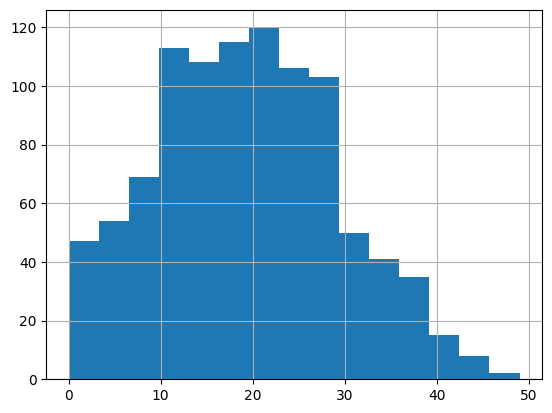

In [117]:
data_generous[data_generous['tariff']=='ultra']['sum_gb_used'].hist(bins = 15)

Распределение немного скошенно вправо

<div class="alert alert-info"> Сравление гистограмм <b>распределения потребления ГБ на тарифах SMART ULTRA</b> </div>

<AxesSubplot:ylabel='Frequency'>

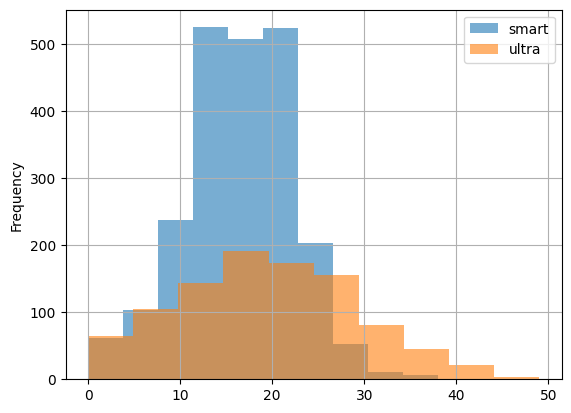

In [118]:
data_generous[data_generous['tariff']=='smart']['sum_gb_used'].plot(
    kind ='hist',
    grid=True,
    label='smart',
    legend=True,
    alpha = 0.6
)
data_generous[data_generous['tariff']=='ultra']['sum_gb_used'].plot(
    kind ='hist',
    grid=True,
    label='ultra',
    legend=True,
    alpha = 0.6
)



Распределение ГБ также немного отличается. На тарифе ULTRA пользователи тратят чуть больше ГБ. Подробнее описано выше.

<div class="alert alert-info"> Сравление графиков <b> потребления ГБ на тарифах SMART и ULTRA по месяцам
   </b> </div>

<AxesSubplot:xlabel='month'>

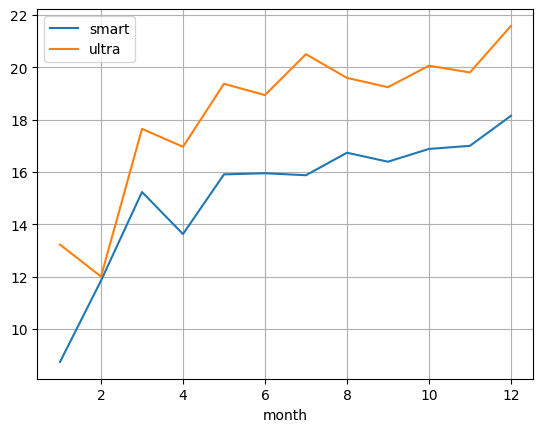

In [119]:
smart_gb = data_generous[data_generous['tariff']=='smart'].groupby('month')['sum_gb_used'].mean()
ultra_gb = data_generous[data_generous['tariff']=='ultra'].groupby('month')['sum_gb_used'].mean()


smart_gb.plot(
    x='month',
    grid=True,
    label='smart',
    legend=True,
) 
ultra_gb.plot(
    x='month',
    grid=True,
    label='ultra',
    legend=True,
)


Отчетливо видим, что потребление минут на тарифе ultra выше.

Такая же тенденция роста по месяцам, как и в минутах, по тем же причинам.

<div class="alert alert-info"> Рассмотрим на гистограмме <b>распределение потребления СМС на тарифе SMART
   </b> </div>

<AxesSubplot:>

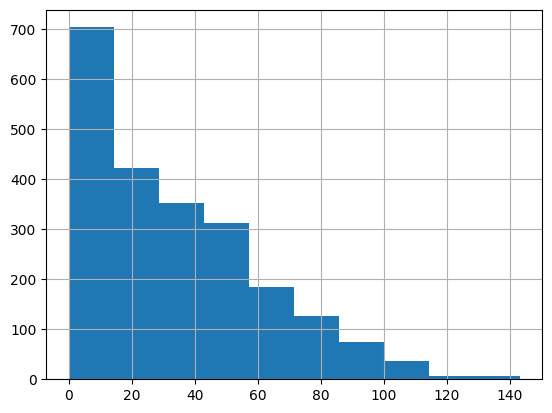

In [120]:
data_generous[data_generous['tariff']=='smart']['message_count'].hist()

Распределение скошенно вправо, что говорит о том, что большое количество людей вообще не отправляет СМС

<div class="alert alert-info"> Рассмотрим на гистограмме <b>распределение потребления СМС на тарифе ULTRA</b> </div>

<AxesSubplot:>

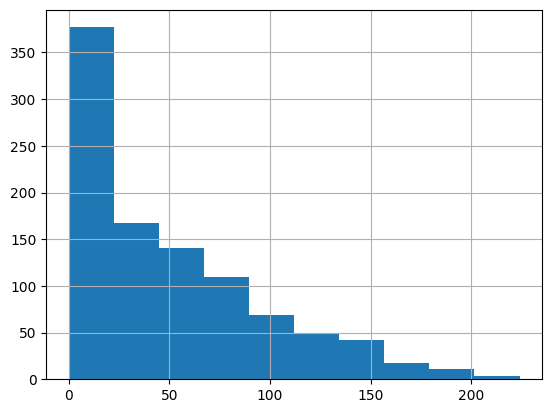

In [121]:
data_generous[data_generous['tariff']=='ultra']['message_count'].hist()

Распределение скошенно вправо. Причина та же.

<div class="alert alert-info"> Сравление гистограмм <b>распределения потребления СМС на тарифах SMART ULTRA</b> </div>

<AxesSubplot:ylabel='Frequency'>

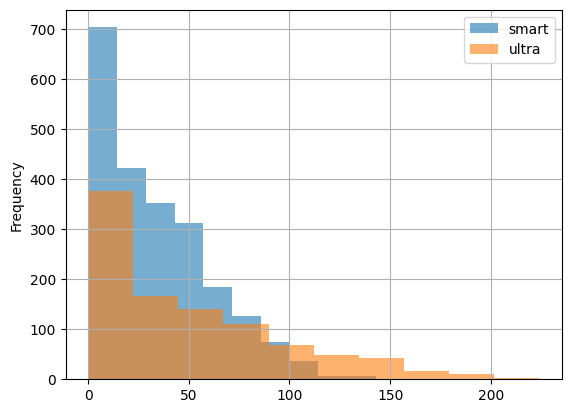

In [122]:
data_generous[data_generous['tariff']=='smart']['message_count'].plot(
    kind ='hist',
    grid=True,
    label='smart',
    legend=True,
    alpha = 0.6
)
data_generous[data_generous['tariff']=='ultra']['message_count'].plot(
    kind ='hist',
    grid=True,
    label='ultra',
    legend=True,
    alpha = 0.6
)

Распределение СМС на тарифе ULTRA скошено вправо чуть сильнее. Пользователи тратят больше СМС, чем на тарифе Smart

<div class="alert alert-info"> Сравление графиков <b> потребления СМС на тарифах SMART и ULTRA по месяцам
   </b> </div>

<AxesSubplot:xlabel='month'>

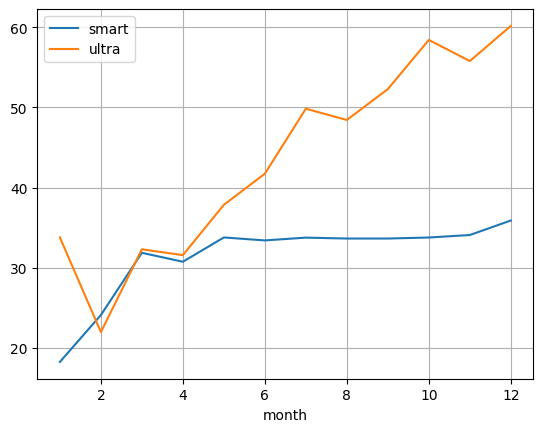

In [123]:
smart_sms = data_generous[data_generous['tariff']=='smart'].groupby('month')['message_count'].mean()
ultra_sms = data_generous[data_generous['tariff']=='ultra'].groupby('month')['message_count'].mean()


smart_sms.plot(
    x='month',
    grid=True,
    label='smart',
    legend=True,

) 
ultra_sms.plot(
    x='month',
    grid=True,
    label='ultra',
    legend=True,
)

<div class="alert alert-info"> Рассмотрим на гистограмме <b>распределение выручки на тарифе SMART</b> </div>

<AxesSubplot:>

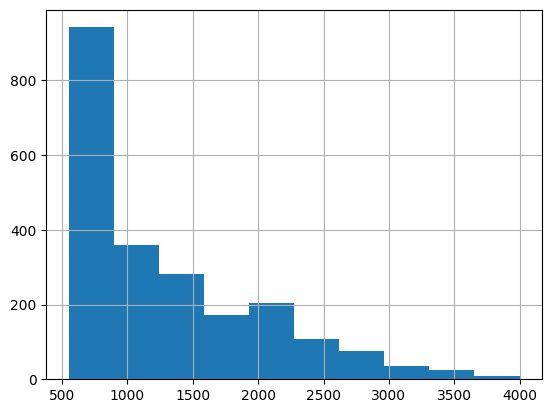

In [124]:
data_generous[data_generous['tariff']=='smart']['revenue'].hist(range=(550, 4000))

Распределение скошенно вправо. Большое количество значений равно абоненской плате - 550р, что говорит о том, что значительная часть абонентов укладывается в ГБ,МИН и СМС которые включены в тариф **(25%)**. Расчет ниже.

In [125]:
print('Количество месяцев, в которые абоненты оплачивали только абоненскую плату на тарифе Smart:')
print(len(data_generous[data_generous['revenue'] == 550][data_generous['tariff'] == 'smart']))
print(60*'=')
print('Доля месяцев, в которые было достаточно того, что включено в тариф:')
print(len(data_generous[data_generous['revenue'] == 550][data_generous['tariff'] == 'smart']) / len(data_generous[data_generous['tariff'] == 'smart']))

Количество месяцев, в которые абоненты оплачивали только абоненскую плату на тарифе Smart:
568
Доля месяцев, в которые было достаточно того, что включено в тариф:
0.2547085201793722


<div class="alert alert-info"> Рассмотрим на гистограмме <b>распределение выручки на тарифе ULTRA</b> </div>

<AxesSubplot:>

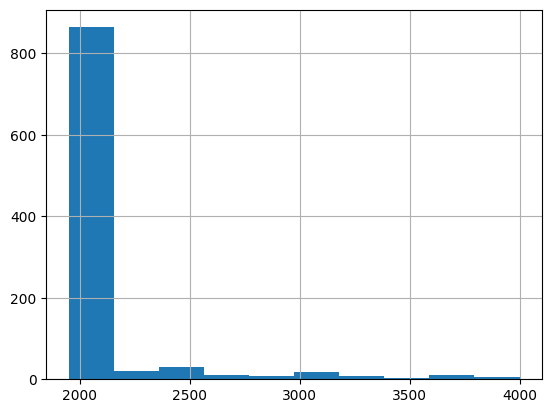

In [126]:
data_generous[data_generous['tariff']=='ultra']['revenue'].hist(range=(1950, 4000))

Распределение скошенно вправо.  Большое количество значений равно абоненской плате - 1950р, что говорит о том, что бОльшая абонентов укладывается в ГБ,МИН и СМС которые включены в тариф **(86%)**. Расчет ниже.

In [127]:
print('Количество абонентов, которые оплачивают только абоненскую плату на тарифе Ultra:')
print(len(data_generous[data_generous['revenue'] == 1950][data_generous['tariff'] == 'ultra']))
print(60*'=')
print('Доля тех, кому достаточно того что включено в тариф:')
print(len(data_generous[data_generous['revenue'] == 1950][data_generous['tariff'] == 'ultra']) / len(data_generous[data_generous['tariff'] == 'ultra']))

Количество абонентов, которые оплачивают только абоненскую плату на тарифе Ultra:
852
Доля тех, кому достаточно того что включено в тариф:
0.8640973630831643


<div class="alert alert-info"> Сравление гистограмм <b>распределения выручки на тарифах SMART ULTRA</b> </div>

<AxesSubplot:ylabel='Frequency'>

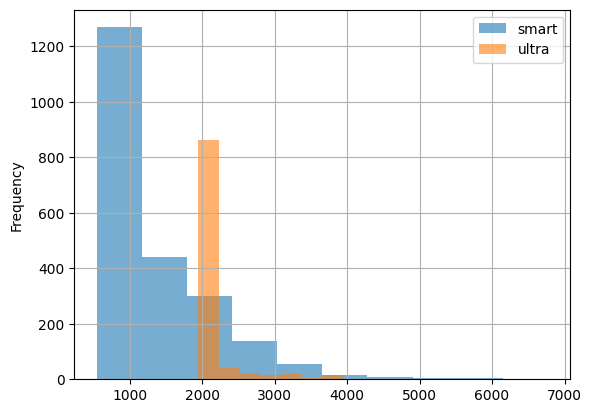

In [128]:
data_generous[data_generous['tariff']=='smart']['revenue'].plot(
    kind ='hist',
    grid=True,
    label='smart',
    legend=True,
    alpha = 0.6
)
data_generous[data_generous['tariff']=='ultra']['revenue'].plot(
    kind ='hist',
    grid=True,
    label='ultra',
    legend=True,
    alpha = 0.6
)

Распределение выручки у тарифа Smart более плавное, так как только 25% абонентов укладываются в ГБ,МИН и СМС предоставленные их тарифным планом. Остальные доплачивают.

<div class="alert alert-info"> Сравление графиков <b> выручки на тарифах SMART и ULTRA по месяцам
   </b> </div>

<AxesSubplot:xlabel='month'>

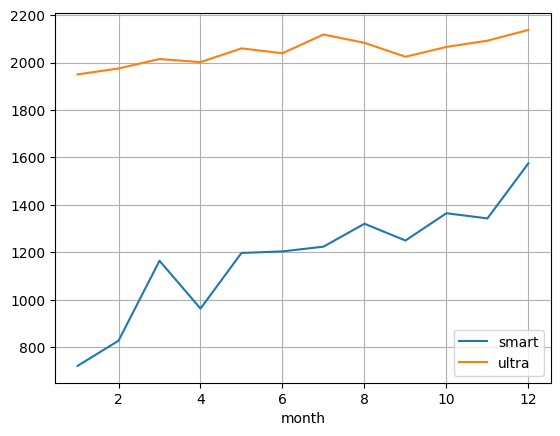

In [129]:
smart_revenue = data_generous[data_generous['tariff']=='smart'].groupby('month')['revenue'].mean()
ultra_revenue = data_generous[data_generous['tariff']=='ultra'].groupby('month')['revenue'].mean()


smart_revenue.plot(
    x='month',
    grid=True,
    label='smart',
    legend=True,

) 
ultra_revenue.plot(
    x='month',
    grid=True,
    label='ultra',
    legend=True,
)

График тарифа Ultra более ровный по причине того что 86% абонов оплачивают только тарифный план. в тарифе Smart выручка зависит от сверх потребления ГБ, МИН и СМС, а оно в свою очередь зависит от того, когда(в начале месяца, середине или конце) абонент подключил себе тарифный план. Поэтому с подключением новых абонентов график ростет.

## Проверка гипотез


<div class="alert alert-info"> Проверяем гипотезу : <b> "Средние выручки пользователей тарифов «Ультра» и «Смарт» различаются". </b>
    
<b>Нулевая гипотеза H₀</b> - выручки пользователей тарифов «Ультра» и «Смарт» НЕ различаются.
    
<b>Альтернативная гипотеза H₁</b>  - выручки пользователей тарифов «Ультра» и «Смарт» различаются. 
   </div>

In [130]:
smart_revenue = data_generous[data_generous['tariff']=='smart']['revenue']
ultra_revenue = data_generous[data_generous['tariff']=='ultra']['revenue']


alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
    smart_revenue, 
    ultra_revenue, equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение:  1.927011394420941e-250
Отвергаем нулевую гипотезу


**Вывод:**   

- Отвергли нулевую гепотезу H₀. 
- Оставили альтернативную H₁ о том, что средние выручки пользователей тарифов «Ультра» и «Смарт» различаются.

<div class="alert alert-info"> Проверяем гипотезу : <b> "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.". </b>
    
<b>Нулевая гипотеза H₀</b> - Средняя выручка пользователей из Москвы НЕ отличается от выручки пользователей из других регионов.
    
<b>Альтернативная гипотеза H₁</b>  - Средняя выручка пользователей из Москвы ОТЛИЧАЕТСЯ от выручки пользователей из других регионов. 
   </div>

In [131]:
moskow_revenue = data_generous[data_generous['city']=='Москва']['revenue']
not_moskow_revenue = data_generous[data_generous['city']!='Москва']['revenue']

alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
    moskow_revenue, 
    not_moskow_revenue, equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.5216952110000279
Не получилось отвергнуть нулевую гипотезу


**Вывод:**
- Полученное значение p-value говорит о том, что хотя выручка пользователей из Москвы и выручка из других городов и неодинакова, с вероятностью в 52% такое различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средней выручкой.

- Не получилось отвергнуть нулевую гипотезу H₀ о том, что выручка пользователей из Москвы НЕ отличается от выручки пользователей из других регионов.

## Общий вывод

**1. Общая информация о датасете:**
    
**Таблица calls:**

- 202 тыс. строк.
- пропусков и дубликатов нет
- есть звонки с продолжительностью 0 (почти 40тыс из 202тыс)- не будем их удалять, так как это пропущенные звонки.
- средняя длительность звонка - 6.7 мин. Медиана - 6 мин.
- в столбце call_date - поменять тип данных на datetime64
- в столбце duration - округлить значения до минут в большую сторону.(для анализа нам будут нужны минуты)
    
**Таблицаа internet:**

- 150 тыс. строк.
- пропусков и дубликатов нет
- среднее потребление интернета - 370 мб. Медиана - 348 мб.
- почти 20 тыс строк из 150 тыс - с нулевой интернет-сессией.
- в столбце session_date - поменять тип данных на datetime64
- в столбце mb_used - в следующих шагах округлим значения с большую сторону и переведем мб в гб(для анализа и расчетов нам будут нужны гб)    

**Таблица messages:**

- 123 тыс. строк.
- пропусков и дубликатов нет
- в столбце message_date - поменять тип данных на datetime64

**Таблица users:**

- 500 строк.
- дубликатов нет. Пропущенные значения в churn_date говорят о том, что тариф ещё действовал на момент выгрузки данных.
- выбросов и неадекватных значений не замечено.
- в столбце churn_date и reg_date - поменять тип данных на datetime64

**Таблица tariffs:**

- Информация о тарифах. Никаких аномалий не замечено.


**2. Была проведена подготовка данных для дальнейшего анализа:**
    
- Замена типов данных в столбцах с датой на datetime64.(Таблицы: calls, internet, messages, users)
- Округление значений до минут в столбце duration(таблица calls)
- Добавление столца month в таблицы data_calls, data_messages, data_internet
- Создание большой сводной таблицы data_generous, которая содержит информацию о тарифах и потреблении МИН, ГБ и СМС по месяцам по каждому абоненту из выборки.
- Добавление к таблице столбца revenue, где была рассчитана выручка по каждому абоненту в зависимости от его тарифного плана и потребления МИН, ГБ и СМС.

**3. Был проведен АНАЛИЗ ДАННЫХ и сделаны выводы:**


**Минуты**
- **На тарифе smart абонены укладываются в свои включенные 500 минут(420 мин в среднем).**
- Среднее и медиана практически не отличаются, значит распределение должно быть нормальным, а не скошенным. 
- Стандартное отклонение 190. А значит все что выше 420+190*3 - можно считать выбросами. Таких значений всего 7 из 2229.


- **На тарифе ultra абоненты тратят не намного больше минут, чем на smart - 545 из 3000, которые включены в тариф.** 
- Среднее чуть больше медианы, а значит распределение будет немного скошенным вправо.
- Стандартное отклонение 307. А значит все что выше 545+307*3 - можно считать выбросами. Таких значений всего 2 из 985.

**Интернет**
- **На тарифе smart абонены используют в среднем 16,3 гб интернета при включенных 15гб**. 
- Медиана выше среднего( 17гб против 16,3 гб), а значит график будет немного скошен влево.
- Стандартное отклонение 5,7 гб. А значит все что выше 16,3+5,7*3 - можно считать выбросами. Таких значений всего 8 из 2229. 


- **На тарифе ultra абонены используют в среднем 19,7 гб интернета при включенных 30гб**. 
- Медиана немного ниже среднего(19гб против 19,7 гб), а значит график будет немного скошен вправо.
- Стандартное отклонение 9,7 гб. А значит все что выше 19,7+9,7*3 - можно считать выбросами. Таких значений всего 1 из 985. 

**СМС**
- **На тарифе smart абонены используют в среднем 39 СМС при включенных 50 СМС.**
- Медиана ниже среднего(34 против 39), а значит график будет скошен вправо.
- Стандартное отклонение 27 смс. А значит все что выше 39+27*3 - можно считать выбросами. Таких значений всего 11 из 2229. 


- **На тарифе ultra абонены используют в среднем 61 СМС при включенных 1000 СМС.**
- Медиана ниже среднего(51 против 61), а значит график будет скошен вправо.
- Стандартное отклонение 46 смс. А значит все что выше 61+46*3 - можно считать выбросами. Таких значений всего 4 из 985.

**Выручка**
- **На тарифе smart средняя выручка по абоненту почти 1300руб, при абоненской плате 550руб**
- Медиана весомо ниже среднего(1020 против 1300), а значит график будет скошен вправо.
- Стандартное отклонение 818 руб. А значит все что выше 1300+818*3 - можно считать выбросами. Таких значений 25 из 2229. 
- Количество абонентов, которые оплачивают только абоненскую плату на тарифе Smart: 567
- **Доля тех, кому достаточно того что включено в тариф: 25%**


- **На тарифе ultra средняя выручка по абоненту почти 2070руб, при абоненской плате 1950**
- Медиана так же ниже среднего(2070 против 1950), а значит график будет скошен вправо.
- Стандартное отклонение намного меньше чем у тарифа smart - 376руб. А значит все что выше 2070+376*3 - можно считать выбросами. Таких значений 34 из 985.
- Количество абонентов, которые оплачивают только абоненскую плату на тарифе Ultra: 851
- **Доля тех, кому достаточно того что включено в тариф: 86%**

**Так как распределение не везде "нормальное" - правило трех сигм не везде работает. Он выбрасов избавляться не будем, а просто имеем ввиду выбивающиеся значения.**


**Итог анализа:** 
Потребление МИНУТ, СМС и ИНТЕРНЕТА на тарифе ULTRA не намного превышает потребление на тарифе SMART. И подавляющего большинства далеко от границ того, что включено в тариф. При этом выручка абонентов ultra намного выше 2070руб против 1300руб на тарифе smart. **Для компании тариф ULTRA более выгоден.**


**4. Была проведена проверка двух гипотез:**
- **Гипотеза о том, что средние выручки пользователей тарифов «Ультра» и «Смарт» различаются - ПРИНИМАЕТСЯ** (так как была отвергнута гипотеза о том, что средние выручки пользователей тарифов «Ультра» и «Смарт» НЕ различаются.)
- **Гипотеза о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов - ОТВЕРГАЕТСЯ** (так как гипотиза о том, что средняя выручка пользователей из Москвы НЕ отличается от выручки пользователей из других регионов не была отвергнута).